* Pandas 10분완성 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation (객체 생성)

In [2]:
# Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # np.random.randn은 0~1 사이의 균일분포에서 난수생성
df

,A,B,C,D
2013-01-01,-0.082251,0.073348,-0.115402,-0.224137
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712
2013-01-04,-1.338675,0.022862,0.643503,0.916534
2013-01-05,0.667009,0.113252,-2.459483,1.376092
2013-01-06,-2.431064,-0.460361,-1.218785,0.701771


In [5]:
# Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# 데이터프레임 결과물의 열은 다양한 데이터 타입 (dtypes)으로 구성됩니다.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data (데이터 확인하기)

In [7]:
# 데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때
df.head()

,A,B,C,D
2013-01-01,-0.082251,0.073348,-0.115402,-0.224137
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712
2013-01-04,-1.338675,0.022862,0.643503,0.916534
2013-01-05,0.667009,0.113252,-2.459483,1.376092


In [8]:
df.tail()  # 끝에서 마지막 5줄 불러옴

,A,B,C,D
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712
2013-01-04,-1.338675,0.022862,0.643503,0.916534
2013-01-05,0.667009,0.113252,-2.459483,1.376092
2013-01-06,-2.431064,-0.460361,-1.218785,0.701771


In [9]:
df.tail(3)  # 끝에서 마지막 3줄을 불러옴

,A,B,C,D
2013-01-04,-1.338675,0.022862,0.643503,0.916534
2013-01-05,0.667009,0.113252,-2.459483,1.376092
2013-01-06,-2.431064,-0.460361,-1.218785,0.701771


In [10]:
# 인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[-0.08225098,  0.07334783, -0.11540175, -0.22413683],
       [ 0.98673662,  0.03488756,  0.62695548,  0.6133887 ],
       [ 0.59178202,  1.16500711, -0.7479273 ,  0.01871206],
       [-1.33867516,  0.0228615 ,  0.64350255,  0.91653412],
       [ 0.66700864,  0.11325225, -2.45948348,  1.37609247],
       [-2.43106406, -0.46036117, -1.21878463,  0.70177111]])

In [13]:
# describe()는 데이터의 대략적인 통계적 정보 요약을 보여줍니다.
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.267744,0.158166,-0.545190,0.567060
std,1.345178,0.536474,1.194235,0.587135
min,-2.431064,-0.460361,-2.459483,-0.224137
25%,-1.024569,0.025868,-1.101070,0.167381
50%,0.254766,0.054118,-0.431665,0.657580
75%,0.648202,0.103276,0.441366,0.862843
max,0.986737,1.165007,0.643503,1.376092


In [14]:
# 데이터를 전치합니다.
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.082251,0.986737,0.591782,-1.338675,0.667009,-2.431064
B,0.073348,0.034888,1.165007,0.022862,0.113252,-0.460361
C,-0.115402,0.626955,-0.747927,0.643503,-2.459483,-1.218785
D,-0.224137,0.613389,0.018712,0.916534,1.376092,0.701771


In [15]:
# 축 별로 정렬합니다.
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.224137,-0.115402,0.073348,-0.082251
2013-01-02,0.613389,0.626955,0.034888,0.986737
2013-01-03,0.018712,-0.747927,1.165007,0.591782
2013-01-04,0.916534,0.643503,0.022862,-1.338675
2013-01-05,1.376092,-2.459483,0.113252,0.667009
2013-01-06,0.701771,-1.218785,-0.460361,-2.431064


In [16]:
# 값 별로 정렬합니다.
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-2.431064,-0.460361,-1.218785,0.701771
2013-01-04,-1.338675,0.022862,0.643503,0.916534
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-01,-0.082251,0.073348,-0.115402,-0.224137
2013-01-05,0.667009,0.113252,-2.459483,1.376092
2013-01-03,0.591782,1.165007,-0.747927,0.018712


# Selection (선택)

## Getting (데이터 얻기)

In [17]:
# df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.
df['A']

2013-01-01   -0.082251
2013-01-02    0.986737
2013-01-03    0.591782
2013-01-04   -1.338675
2013-01-05    0.667009
2013-01-06   -2.431064
Freq: D, Name: A, dtype: float64

In [18]:
# 행을 분할하는 [ ]를 통해 선택합니다.
df[0:3]

,A,B,C,D
2013-01-01,-0.082251,0.073348,-0.115402,-0.224137
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712
2013-01-04,-1.338675,0.022862,0.643503,0.916534


## Selection by Label (Label 을 통한 선택)

In [20]:
#라벨을 사용하여 횡단면을 얻습니다.
df.loc[dates[0]]

A   -0.082251
B    0.073348
C   -0.115402
D   -0.224137
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
#라벨을 사용하여 여러 축 (의 데이터)을 얻습니다.
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.082251,0.073348
2013-01-02,0.986737,0.034888
2013-01-03,0.591782,1.165007
2013-01-04,-1.338675,0.022862
2013-01-05,0.667009,0.113252
2013-01-06,-2.431064,-0.460361


In [22]:
#양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.986737,0.034888
2013-01-03,0.591782,1.165007
2013-01-04,-1.338675,0.022862


In [23]:
#반환되는 객체의 차원를 줄입니다.
df.loc['20130102',['A','B']]

A    0.986737
B    0.034888
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
#스칼라 값을 얻습니다.
df.at[dates[0],'A']

-0.08225097741865801

## Selection by Position (위치로 선택하기)

In [27]:
#넘겨받은 정수의 위치를 기준으로 선택합니다.
df.iloc[3]

A   -1.338675
B    0.022862
C    0.643503
D    0.916534
Name: 2013-01-04 00:00:00, dtype: float64

In [28]:
#정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동합니다.
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.338675,0.022862
2013-01-05,0.667009,0.113252


In [29]:
#정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해집니다.
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.986737,0.626955
2013-01-03,0.591782,-0.747927
2013-01-05,0.667009,-2.459483


In [30]:
#명시적으로 행을 나누고자 하는 경우입니다.
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712


In [31]:
#명시적으로 열을 나누고자 하는 경우입니다.
df.iloc[:,1:3]

,B,C
2013-01-01,0.073348,-0.115402
2013-01-02,0.034888,0.626955
2013-01-03,1.165007,-0.747927
2013-01-04,0.022862,0.643503
2013-01-05,0.113252,-2.459483
2013-01-06,-0.460361,-1.218785


In [32]:
#명시적으로 (특정한) 값을 얻고자 하는 경우입니다.
df.iloc[1,1]

0.034887561257285246

In [33]:
#스칼라 값을 빠르게 얻는 방법입니다 (위의 방식과 동일합니다).
df.iat[1,1]

0.034887561257285246

## Boolean Indexing

In [35]:
#데이터를 선택하기 위해 단일 열의 값을 사용합니다.
df[df.A > 0]

,A,B,C,D
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,-0.747927,0.018712
2013-01-05,0.667009,0.113252,-2.459483,1.376092


In [36]:
#Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.073348,NaN,NaN
2013-01-02,0.986737,0.034888,0.626955,0.613389
2013-01-03,0.591782,1.165007,NaN,0.018712
2013-01-04,NaN,0.022862,0.643503,0.916534
2013-01-05,0.667009,0.113252,NaN,1.376092
2013-01-06,NaN,NaN,NaN,0.701771


In [37]:
#필터링을 위한 메소드 isin()을 사용합니다.
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.082251,0.073348,-0.115402,-0.224137,one
2013-01-02,0.986737,0.034888,0.626955,0.613389,one
2013-01-03,0.591782,1.165007,-0.747927,0.018712,two
2013-01-04,-1.338675,0.022862,0.643503,0.916534,three
2013-01-05,0.667009,0.113252,-2.459483,1.376092,four
2013-01-06,-2.431064,-0.460361,-1.218785,0.701771,three


In [38]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.591782,1.165007,-0.747927,0.018712,two
2013-01-05,0.667009,0.113252,-2.459483,1.376092,four


## Setting (설정)

In [39]:
#새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1

In [41]:
#라벨에 의해 값을 설정합니다.
df.at[dates[0],'A'] = 0

In [42]:
#위치에 의해 값을 설정합니다.
df.iat[0,1] = 0

In [43]:
#Numpy 배열을 사용한 할당에 의해 값을 설정합니다.
df.loc[:,'D'] = np.array([5] * len(df))

In [44]:
#위 설정대로 작동한 결과입니다.
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.115402,5,NaN
2013-01-02,0.986737,0.034888,0.626955,5,1.0
2013-01-03,0.591782,1.165007,-0.747927,5,2.0
2013-01-04,-1.338675,0.022862,0.643503,5,3.0
2013-01-05,0.667009,0.113252,-2.459483,5,4.0
2013-01-06,-2.431064,-0.460361,-1.218785,5,5.0


In [45]:
#where 연산을 설정합니다.
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.115402,-5,NaN
2013-01-02,-0.986737,-0.034888,-0.626955,-5,-1.0
2013-01-03,-0.591782,-1.165007,-0.747927,-5,-2.0
2013-01-04,-1.338675,-0.022862,-0.643503,-5,-3.0
2013-01-05,-0.667009,-0.113252,-2.459483,-5,-4.0
2013-01-06,-2.431064,-0.460361,-1.218785,-5,-5.0


# Missing Data (결측치)

In [46]:
#Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제할 수 있습니다. Reindexing은 데이터의 복사본을 반환합니다.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.115402,5,NaN,1.0
2013-01-02,0.986737,0.034888,0.626955,5,1.0,1.0
2013-01-03,0.591782,1.165007,-0.747927,5,2.0,NaN
2013-01-04,-1.338675,0.022862,0.643503,5,3.0,NaN


In [47]:
#결측치를 가지고 있는 행들을 지웁니다.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.986737,0.034888,0.626955,5,1.0,1.0


In [48]:
#결측치를 채워 넣습니다.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.115402,5,5.0,1.0
2013-01-02,0.986737,0.034888,0.626955,5,1.0,1.0
2013-01-03,0.591782,1.165007,-0.747927,5,2.0,5.0
2013-01-04,-1.338675,0.022862,0.643503,5,3.0,5.0


In [49]:
#nan인 값에 boolean을 통한 표식을 얻습니다.
#데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operation (연산)

## Stats (통계)

In [50]:
#기술통계를 수행합니다.
df.mean()

A   -0.254035
B    0.145941
C   -0.545190
D    5.000000
F    3.000000
dtype: float64

In [51]:
#다른 축에서 동일한 연산을 수행합니다.
df.mean(1)

2013-01-01    1.221150
2013-01-02    1.529716
2013-01-03    1.601772
2013-01-04    1.465538
2013-01-05    1.464155
2013-01-06    1.177958
Freq: D, dtype: float64

In [52]:
#정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.
#broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.408218,0.165007,-1.747927,4.0,1.0
2013-01-04,-4.338675,-2.977138,-2.356497,2.0,0.0
2013-01-05,-4.332991,-4.886748,-7.459483,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply (적용)

In [54]:
#데이터에 함수를 적용합니다.
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.115402,5,NaN
2013-01-02,0.986737,0.034888,0.511554,10,1.0
2013-01-03,1.578519,1.199895,-0.236374,15,3.0
2013-01-04,0.239843,1.222756,0.407129,20,6.0
2013-01-05,0.906852,1.336008,-2.052355,25,10.0
2013-01-06,-1.524212,0.875647,-3.271139,30,15.0


In [55]:
df.apply(lambda x: x.max() - x.min())

A    3.417801
B    1.625368
C    3.102986
D    0.000000
F    4.000000
dtype: float64

## Histogramming (히스토그래밍)

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    3
2    5
3    3
4    0
5    4
6    2
7    2
8    6
9    3
dtype: int32

In [57]:
s.value_counts()

3    4
2    2
6    1
5    1
4    1
0    1
dtype: int64

## String Methods (문자열 메소드)

In [58]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge (병합)

## Concat (연결)

In [59]:
#concat()으로 pandas 객체를 연결합니다.
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.782768,0.276693,0.697387,1.120981
1,0.666109,-1.778869,-0.609722,0.541845
2,1.415675,0.766620,0.528475,-0.468748
3,-0.142309,0.175043,0.003804,-0.990593
4,0.435905,2.293755,-0.274620,-1.123625
5,-1.396158,0.479799,-1.222235,0.418308
6,0.847557,-0.902702,-0.337340,-0.246761
7,1.222470,2.086794,0.261161,-0.650997
8,-1.695232,-0.055128,0.686508,-0.538637
9,-0.687597,0.277059,0.713151,-1.063675


In [60]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.782768,0.276693,0.697387,1.120981
1,0.666109,-1.778869,-0.609722,0.541845
2,1.415675,0.766620,0.528475,-0.468748
3,-0.142309,0.175043,0.003804,-0.990593
4,0.435905,2.293755,-0.274620,-1.123625
5,-1.396158,0.479799,-1.222235,0.418308
6,0.847557,-0.902702,-0.337340,-0.246761
7,1.222470,2.086794,0.261161,-0.650997
8,-1.695232,-0.055128,0.686508,-0.538637
9,-0.687597,0.277059,0.713151,-1.063675


## Join (결합)

In [61]:
#SQL 방식으로 병합합니다.
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append (추가)

In [64]:
#데이터프레임에 행을 추가합니다.
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.094602,0.609486,-0.886831,0.429455
1,0.627806,-1.214395,1.280546,-0.181162
2,0.299796,-0.804019,-0.534823,0.433706
3,-0.562144,-0.407298,-0.010676,-2.011484
4,-0.268186,0.864700,-0.139140,-0.130153
5,0.180554,-1.411738,0.087701,2.146258
6,-0.723059,-0.737294,-1.109522,-0.765054
7,2.074182,-0.717750,0.074032,1.694147


In [65]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.094602,0.609486,-0.886831,0.429455
1,0.627806,-1.214395,1.280546,-0.181162
2,0.299796,-0.804019,-0.534823,0.433706
3,-0.562144,-0.407298,-0.010676,-2.011484
4,-0.268186,0.864700,-0.139140,-0.130153
5,0.180554,-1.411738,0.087701,2.146258
6,-0.723059,-0.737294,-1.109522,-0.765054
7,2.074182,-0.717750,0.074032,1.694147
8,-0.562144,-0.407298,-0.010676,-2.011484


# Grouping (그룹화)
그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.

* 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
* 각 그룹에 독립적으로 함수를 적용 (applying)
* 결과물들을 하나의 데이터 구조로 결합 (combining)

In [66]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,-0.328424,-1.766619
1,bar,one,0.153483,-0.757102
2,foo,two,-0.459357,-1.906613
3,bar,three,0.791561,0.669879
4,foo,two,0.307202,0.589852
5,bar,two,-0.847936,-2.082740
6,foo,one,-0.118709,-0.445055
7,foo,three,1.057489,-0.558617


In [67]:
#생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용합니다.
df.groupby('A').sum()

,C,D
A,,
bar,0.097108,-2.169963
foo,0.458201,-4.087052


In [68]:
#여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.153483 -0.757102
    three  0.791561  0.669879
    two   -0.847936 -2.082740
foo one   -0.447133 -2.211673
    three  1.057489 -0.558617
    two   -0.152155 -1.316762

# Reshaping (변형)

## Stack (스택)

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2  =  df[:4]
df2

A         B
first second                    
bar   one    -1.318044  1.041687
      two    -1.744912 -0.420265
baz   one    -0.540210  0.731340
      two    -0.370476 -1.066234

In [70]:
#stack() 메소드는 데이터프레임 열들의 계층을 “압축”합니다.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.318044
               B    1.041687
       two     A   -1.744912
               B   -0.420265
baz    one     A   -0.540210
               B    0.731340
       two     A   -0.370476
               B   -1.066234
dtype: float64

In [71]:
#“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 
# 기본적으로 마지막 계층을 unstack합니다.
stacked.unstack()

A         B
first second                    
bar   one    -1.318044  1.041687
      two    -1.744912 -0.420265
baz   one    -0.540210  0.731340
      two    -0.370476 -1.066234

In [72]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.318044 -1.744912
      B  1.041687 -0.420265
baz   A -0.540210 -0.370476
      B  0.731340 -1.066234

In [73]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.318044 -0.540210
       B  1.041687  0.731340
two    A -1.744912 -0.370476
       B -0.420265 -1.066234

## Pivot Tables (피봇 테이블)

In [74]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.813196,0.408794
1,one,B,foo,0.591483,1.467583
2,two,C,foo,-0.856187,0.590744
3,three,A,bar,0.783524,0.121049
4,one,B,bar,0.664145,0.573175
5,one,C,bar,-0.000568,-1.341071
6,two,A,foo,0.520759,0.616778
7,three,B,foo,1.610641,-0.611033
8,one,C,foo,-0.755639,0.376127
9,one,A,bar,1.285384,0.712022


In [75]:
#이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.285384  0.813196
      B  0.664145  0.591483
      C -0.000568 -0.755639
three A  0.783524       NaN
      B       NaN  1.610641
      C -0.070827       NaN
two   A       NaN  0.520759
      B  0.963845       NaN
      C       NaN -0.856187

# Time Series (시계열)
Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다.

In [76]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23441
Freq: 5T, dtype: int32

In [78]:
#시간대를 표현합니다.
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.409177
2012-03-07   -1.403425
2012-03-08    0.211142
2012-03-09   -0.220169
2012-03-10   -0.876487
Freq: D, dtype: float64

In [79]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.409177
2012-03-07 00:00:00+00:00   -1.403425
2012-03-08 00:00:00+00:00    0.211142
2012-03-09 00:00:00+00:00   -0.220169
2012-03-10 00:00:00+00:00   -0.876487
Freq: D, dtype: float64

In [80]:
#다른 시간대로 변환합니다.
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.409177
2012-03-06 19:00:00-05:00   -1.403425
2012-03-07 19:00:00-05:00    0.211142
2012-03-08 19:00:00-05:00   -0.220169
2012-03-09 19:00:00-05:00   -0.876487
Freq: D, dtype: float64

In [81]:
#시간 표현 ↔ 기간 표현으로 변환합니다.
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.483534
2012-02-29   -0.765135
2012-03-31   -0.549712
2012-04-30    0.789874
2012-05-31    0.071491
Freq: M, dtype: float64

In [82]:
ps = ts.to_period()
ps

2012-01   -0.483534
2012-02   -0.765135
2012-03   -0.549712
2012-04    0.789874
2012-05    0.071491
Freq: M, dtype: float64

In [83]:
ps.to_timestamp()

2012-01-01   -0.483534
2012-02-01   -0.765135
2012-03-01   -0.549712
2012-04-01    0.789874
2012-05-01    0.071491
Freq: MS, dtype: float64

In [84]:
#기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 
#다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.182231
1990-06-01 09:00   -0.213634
1990-09-01 09:00    0.015035
1990-12-01 09:00   -0.987547
1991-03-01 09:00    0.523298
Freq: H, dtype: float64

# Categoricals (범주화)

In [85]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [86]:
#가공하지 않은 성적을 범주형 데이터로 변환합니다.
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [87]:
#범주에 더 의미 있는 이름을 붙여주세요 (Series.cat.categories로 할당하는 것이 적합합니다).
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [88]:
#범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다 (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [89]:
#정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.
#위에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열됩니다.
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [90]:
#범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting (그래프)

<AxesSubplot:>

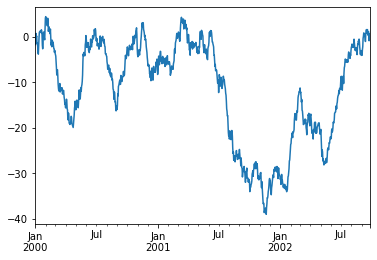

In [91]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

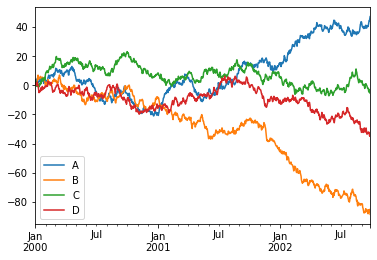

In [92]:
#데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In / Out (데이터 입 / 출력)

## CSV

In [93]:
#csv 파일에 씁니다.
df.to_csv('foo.csv')

In [94]:
#csv 파일을 읽습니다.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.101339,0.771971,1.193038,0.852155
1,2000-01-02,1.826247,0.768824,2.647745,0.135241
2,2000-01-03,4.139410,0.451657,2.420597,1.278807
3,2000-01-04,3.674483,-0.323758,2.586324,0.566502
4,2000-01-05,4.039909,0.739168,0.476818,0.006953
...,...,...,...,...,...
995,2002-09-22,42.602117,-85.545115,-4.634593,-32.408237
996,2002-09-23,44.259964,-85.781700,-4.509841,-32.348702
997,2002-09-24,44.176696,-85.150489,-2.876305,-34.331057
998,2002-09-25,45.826033,-86.464132,-3.506229,-34.977767


## HDF5

In [95]:
#HDF5 Store에 씁니다.
df.to_hdf('foo.h5','df')

In [96]:
#HDF5 Store에서 읽어옵니다.
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.101339,0.771971,1.193038,0.852155
2000-01-02,1.826247,0.768824,2.647745,0.135241
2000-01-03,4.139410,0.451657,2.420597,1.278807
2000-01-04,3.674483,-0.323758,2.586324,0.566502
2000-01-05,4.039909,0.739168,0.476818,0.006953
...,...,...,...,...
2002-09-22,42.602117,-85.545115,-4.634593,-32.408237
2002-09-23,44.259964,-85.781700,-4.509841,-32.348702
2002-09-24,44.176696,-85.150489,-2.876305,-34.331057
2002-09-25,45.826033,-86.464132,-3.506229,-34.977767


## Excel

In [97]:
#엑셀 파일에 씁니다.
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [98]:
#엑셀 파일을 읽어옵니다.
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.101339,0.771971,1.193038,0.852155
1,2000-01-02,1.826247,0.768824,2.647745,0.135241
2,2000-01-03,4.139410,0.451657,2.420597,1.278807
3,2000-01-04,3.674483,-0.323758,2.586324,0.566502
4,2000-01-05,4.039909,0.739168,0.476818,0.006953
...,...,...,...,...,...
995,2002-09-22,42.602117,-85.545115,-4.634593,-32.408237
996,2002-09-23,44.259964,-85.781700,-4.509841,-32.348702
997,2002-09-24,44.176696,-85.150489,-2.876305,-34.331057
998,2002-09-25,45.826033,-86.464132,-3.506229,-34.977767


# Gotchas (잡았다!)

In [99]:
#연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.

if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [100]:
#이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
